<a href="https://colab.research.google.com/github/sneezedsherry/Data-wrangling/blob/master/salton_sea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center>Salton Sea Water Quality Data Preparation from USGS</center>


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import pandas as pd
import numpy as np

# display all the columns and rows

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

#1. Collect, clean and reshape data from USGS

In [0]:
# get all the sites' titles and csv file ids from the file and load them into pandas
# code source: http://nali.org/load-google-drive-csv-panda-dataframe-google-colab/

file_list = drive.ListFile({'q': "'1mcW-2HFEUDFJO8VI08wpP-qFZ6es-goR' in parents and trashed=false"}).GetList()
df_list = []
for file1 in file_list:
  downloaded = drive.CreateFile({'id': file1['id']})
  downloaded.GetContentFile(file1['title'])
  df_list.append(pd.read_csv(file1['title']))

In [0]:
# display values in specific columns to see if we import the data correctly

df_list[1][['ActivityStartDate','ActivityStartTime/Time','MonitoringLocationIdentifier','CharacteristicName','ResultMeasureValue']]

In [0]:
# create an empty dataframe that contains the target coloumns

df_usgs = pd.DataFrame(columns=['ActivityStartDate','ActivityStartTime/Time','MonitoringLocationIdentifier','CharacteristicName','ResultMeasureValue'])

# load the data into the dataframe

for i, df in enumerate(df_list):
  # print('handling :', i)
  # see by which step we might be stuck
  sub_df = df[['ActivityStartDate','ActivityStartTime/Time','MonitoringLocationIdentifier','CharacteristicName','ResultMeasureValue']]
  df_usgs = pd.concat([df_usgs, sub_df], ignore_index=True)

In [0]:
# see the information of the dataframe we integrated

df_usgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7415 entries, 0 to 7414
Data columns (total 5 columns):
ActivityStartDate               7415 non-null object
ActivityStartTime/Time          7104 non-null object
MonitoringLocationIdentifier    7415 non-null object
CharacteristicName              7415 non-null object
ResultMeasureValue              6846 non-null float64
dtypes: float64(1), object(4)
memory usage: 289.8+ KB


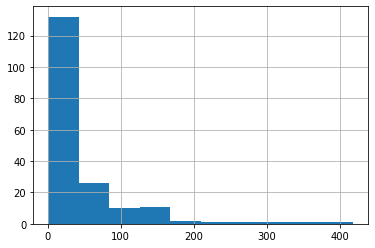

In [0]:
# see the distribution of characteristic data

df_usgs.CharacteristicName.value_counts().hist()

# From the histgram we can see that most of the characteristics have less than 100 values. Only few of them have over 300 values.

In [0]:
# Filter the top 30 characteristics

df_usgs.CharacteristicName.value_counts()[:30]

Specific conductance                                            418
Total dissolved solids                                          349
pH                                                              317
Hydrogen ion                                                    265
Temperature, water                                              234
Ammonia and ammonium                                            209
Orthophosphate                                                  169
Boron                                                           164
Chloride                                                        155
Sulfate                                                         143
Hardness, Ca, Mg                                                140
Calcium                                                         138
Magnesium                                                       136
Alkalinity, total                                               134
Sodium                                          

In [0]:
# Pivot the dataframe and get target characteristics group by date, time and location
df_pivot = pd.get_dummies(data=df_usgs['CharacteristicName']).mul(df_usgs['ResultMeasureValue'], axis=0, fill_value=None).replace(0, np.nan)
df_pivot = pd.concat([df_usgs, df_pivot], axis=1).drop(['CharacteristicName', 'ResultMeasureValue', 'ActivityStartTime/Time'], axis=1)
cols = df_pivot.columns.drop(['ActivityStartDate','MonitoringLocationIdentifier'])
df_pivot[cols] = df_pivot[cols].apply(pd.to_numeric)
df_pivot.head()

,ActivityStartDate,MonitoringLocationIdentifier,.alpha.-Endosulfan,.lambda.-Cyhalothrin,"1H-Pyrazole-3-carbonitrile, 5-amino-1-[2,6-dichloro-4-(trifluoromethyl)phenyl]-4-(trifluoromethyl)-","2,4,5-T","2,4-D","3,4-Dichloroaniline","5-Amino-1-[2,6-dichloro-4-(trifluoromethyl)phenyl]-4-[(trifluoromethyl)thio]pyrazole-3-carbonitrile",Aldrin,"Alkalinity, total",Allethrin,Alpha emitting radium isotopes,Alpha particle,Aluminum,Ametryn,Ammonia and ammonium,Antimony,Arsenic,Atrazine,Azoxystrobin,Barium,Barometric pressure,Beta Cypermethrin,Beta particle,Bicarbonate,Bifenthrin,"Biochemical oxygen demand, standard conditions","Biomass, periphyton",Boron,Bromide,Butylate,Cadmium,Calcium,Carbaryl,Carbofuran,Carbon dioxide,Carbonate,Carbophenothion,Carbophenothion-methyl,"Chemical oxygen demand, (high level)","Chemical oxygen demand, (low level)","Chlordane, technical",Chloride,Chlorinated naphthalenes,Chlorophyll a,Chlorophyll b,Chlorothalonil,Chlorpyrifos,Chlorthal-dimethyl,Chromium,Cobalt,Copper,Cyanazine,Cyanide,Cycloate,Cyfluthrin,Cyproconazole,Deltamethrin,Deuterium,Diazinon,Dicamba,Dichloroprop,Dieldrin,Disulfoton,Endrin,Esfenvalerate,Ethalfluralin,Ethion,Ethylan,Fecal Streptococcus Group Bacteria,Fenpropathrin,Fipronil,Fipronil Sulfone,Fluoride,Fonofos,Gage height,Gross-Uranium,"Hardness, Ca, Mg","Hardness, non-carbonate","Height, gage",Heptachlor,Heptachlor epoxide,Hexazinone,Hydrogen ion,Inorganic nitrogen (nitrate and nitrite),Iprodione,Iron,Kjeldahl nitrogen,Lead,Lignin,Lindane,Lithium,MBAS,Magnesium,Malathion,Manganese,Mercury,Metconazole,Methidathion,Methomyl,Methoprene,Methoxychlor,Methyl parathion,Metolachlor,Mevinphos,Mirex,Molinate,Molybdenum,Myclobutanil,Napropamide,Nickel,Nitrate,Nitrite,"Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)",Oil and Grease,Organic Nitrogen,Organic carbon,Orthophosphate,Oxyfluorfen,Oxygen,Oxygen-18,Parathion,Pebulate,Pendimethalin,Pentachloroanisole,Pentachloronitrobenzene,Permethrin,Phenols,Phenothrin,Phorate,Phosmet,Phosphate-phosphorus,Phosphorus,Phytoplankton,Picloram,Piperonyl butoxide,Polychlorinated biphenyls,Potassium,Potassium-40,Prometon,Prometryn,Propanil,Propazine,Propham,Propiconazole,Resmethrin,S-Ethyl dipropylthiocarbamate,Sediment,Selenium,Silica,Silver,Silvex,Simazine,Simetryn,Sodium,Sodium adsorption ratio [(Na)/(sq root of 1/2 Ca + Mg)],Sodium plus potassium,"Sodium, percent total cations",Specific conductance,"Stream flow, instantaneous","Stream flow, mean. daily",Strontium,Sulfate,Sulfur-34/Sulfur-32 ratio,Suspended Sediment Concentration (SSC),Tau-fluvalinate,Tebuconazole,"Temperature, air, deg C","Temperature, water",Tetraconazole,Tetramethrin,Thiobencarb,Total dissolved solids,Total solids,Total suspended solids,Toxaphene,Tribufos,Trifloxystrobin,Trifluralin,Tritium,Turbidity,Vanadium,Zinc,"p,p'-DDD","p,p'-DDE","p,p'-DDT",pH
0,2001-10-20,USGS-331242115371401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-09-19,USGS-331242115371401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [0]:
df_date = df_pivot.groupby(['ActivityStartDate', 'MonitoringLocationIdentifier']).mean()
#df_date.head(10)
df_date.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 236 entries, (1/1/1989, USGS-10254005) to (9/1/1994, USGS-10254005)
Columns: 186 entries, .alpha.-Endosulfan to pH
dtypes: float64(186)
memory usage: 345.8+ KB
